In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline

### Regularization with Weight Decay

In [2]:
!wget http://work.caltech.edu/data/in.dta

--2017-10-31 19:10:43--  http://work.caltech.edu/data/in.dta
Resolving work.caltech.edu (work.caltech.edu)... 64:ff9b::83d7:8563, 131.215.133.99
Connecting to work.caltech.edu (work.caltech.edu)|64:ff9b::83d7:8563|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1750 (1.7K) [text/plain]
Saving to: ‘in.dta’

in.dta              100%[===================>]   1.71K  --.-KB/s    in 0s      

2017-10-31 19:10:44 (72.3 MB/s) - ‘in.dta’ saved [1750/1750]



In [3]:
!wget http://work.caltech.edu/data/out.dta

--2017-10-31 19:10:56--  http://work.caltech.edu/data/out.dta
Resolving work.caltech.edu (work.caltech.edu)... 64:ff9b::83d7:8563, 131.215.133.99
Connecting to work.caltech.edu (work.caltech.edu)|64:ff9b::83d7:8563|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12500 (12K) [text/plain]
Saving to: ‘out.dta’

out.dta             100%[===================>]  12.21K  --.-KB/s    in 0.003s  

2017-10-31 19:10:56 (3.73 MB/s) - ‘out.dta’ saved [12500/12500]



In [4]:
!head in.dta

In [5]:
!head out.dta

In [18]:
in_data = np.loadtxt('in.dta')
out_data = np.loadtxt('out.dta')

In [19]:
X_train, y_train = in_data[:, :-1], in_data[:, -1]
X_train.shape, y_train.shape

((35, 2), (35,))

In [20]:
X_test, y_test = out_data[:, :-1], out_data[:, -1]
X_test.shape, y_test.shape

((250, 2), (250,))

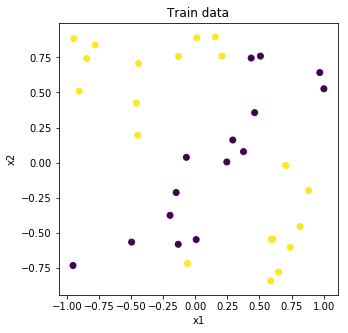

In [26]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Train data')
plt.xlabel('x1')
plt.ylabel('x2')

In [42]:
def z_transform(X):
    '''
    input => (x1, x2)
    output => (1, x1, x2, x1**2, x2**2, x1*x2, |x1-x2|, |x1+x2|)
    '''
    x1, x2 = X.T
    return np.c_[np.ones(X.shape[0]), x1, x2, x1**2, x2**2, x1*x2, np.abs(x1 - x2), np.abs(x1 + x2)]

def clf_error(y_true, y_pred):
    errors = (y_true != y_pred).sum() / len(y_true)
    return errors

In [29]:
X_train_transform = z_transform(X_train)
X_test_transform = z_transform(X_test)

X_train_transform.shape, X_test_transform.shape

((35, 8), (250, 8))

In [30]:
linreg = LinearRegression().fit(X_train_transform, y_train)

In [43]:
y_train_pred = np.sign(linreg.predict(X_train_transform))
y_test_pred = np.sign(linreg.predict(X_test_transform))

In [44]:
clf_error(y_train, y_train_pred)

0.028571428571428571

In [45]:
clf_error(y_test, y_test_pred)

0.084000000000000005

In [60]:
class MyLinearClassifier:
    
    def __init__(self, alpha=0.0):
        self.alpha = alpha
        
    def fit(self, X, y):
        self.w_ = np.dot(np.linalg.inv(np.dot(X.T, X) + self.alpha*np.identity(X.shape[1])), np.dot(X.T, y))
        #self.w_ = np.dot(np.linalg.pinv(X), y) + np.dot(self.alpha*np.identity(X.shape[1]), np.dot(X.T, y))
        return self
        
    def predict(self, X):
        return np.sign(np.dot(X, self.w_))
    
    def score(self, X, y):
        y_pred = self.predict(X)
        miss_classify = (y != y_pred).sum() / len(y)
        return miss_classify

In [61]:
my_lin = MyLinearClassifier()

In [62]:
my_lin.fit(X_train_transform, y_train)

In [63]:
my_lin.score(X_train_transform, y_train)

0.028571428571428571

In [64]:
my_lin.score(X_test_transform, y_test)

0.084000000000000005

In [65]:
my_lin2 = MyLinearClassifier(alpha=1e-3).fit(X_train_transform, y_train)

In [66]:
my_lin2.score(X_train_transform, y_train)

0.028571428571428571

In [67]:
my_lin2.score(X_test_transform, y_test)

0.080000000000000002

In [68]:
my_lin3 = MyLinearClassifier(alpha=1e3).fit(X_train_transform, y_train)

In [69]:
my_lin3.score(X_train_transform, y_train)

0.37142857142857144

In [70]:
my_lin3.score(X_test_transform, y_test)

0.436

In [73]:
for k in range(-10, 10):
    m = MyLinearClassifier(alpha=10**k).fit(X_train_transform, y_train)
    print('k={}, out_score: {}'.format(k, m.score(X_test_transform, y_test)))

k=-10, out_score: 0.084
k=-9, out_score: 0.084
k=-8, out_score: 0.084
k=-7, out_score: 0.084
k=-6, out_score: 0.084
k=-5, out_score: 0.084
k=-4, out_score: 0.084
k=-3, out_score: 0.08
k=-2, out_score: 0.084
k=-1, out_score: 0.056
k=0, out_score: 0.092
k=1, out_score: 0.124
k=2, out_score: 0.228
k=3, out_score: 0.436
k=4, out_score: 0.452
k=5, out_score: 0.456
k=6, out_score: 0.456
k=7, out_score: 0.456
k=8, out_score: 0.456
k=9, out_score: 0.456


In [75]:
ridge = Ridge(alpha=.1).fit(X_train_transform, y_train)

In [78]:
y_test_pred = np.sign(ridge.predict(X_test_transform))

In [79]:
clf_error(y_test, y_test_pred)

0.056000000000000001

In [80]:
170 + 18*17 + 18

494

In [81]:
180 + 19*16 + 17

501

In [82]:
190 + 20*15 + 16

506

In [83]:
200 + 21*14 + 15

509

In [84]:
210 + 22*13 + 14

510